# Similarity metrics for categorical data

In [2]:
import pandas as pd
df2 = pd.read_csv("Papers.csv",sep=",")
df2.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


## to gather all the unique keywords, and assign a unique index to each of them to generate a new column name 'keword_n' for each keyword

In [3]:
keywords_mapping = {}
keyword_index = 0

for k in df2.keywords:
    k = k.split('\n')
    for kw in k:
        if keywords_mapping.get(kw,None) is None:
            keywords_mapping[kw]='keyword_'+str(keyword_index)
            keyword_index+=1

## generate a new set of columns using this keyword to column name mapping, to set a 1 in each row where the keyword appears in that article's keywords

In [4]:
for (k,v) in keywords_mapping.items():
    df2[v] = df2.keywords.map( lambda x: 1 if k in x.split('\n') else 0 )

In [5]:
df2.head().iloc[:,6:]

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,keyword_8,keyword_9,...,keyword_1391,keyword_1392,keyword_1393,keyword_1394,keyword_1395,keyword_1396,keyword_1397,keyword_1398,keyword_1399,keyword_1400
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Use the Manhattan distance as an example, we can use MDS again to plot the arrangement of the documents in keyword 

In [8]:
import numpy as np
import sklearn.metrics.pairwise as pairwise
distances = pairwise.pairwise_distances(np.float64(np.array(df2)[:,6:]),metric='manhattan')

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


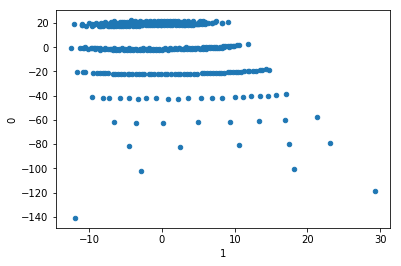

In [11]:
from sklearn.manifold import MDS
% matplotlib inline
mds_coords = MDS().fit_transform(distances)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)